In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading our dataset
data = pd.read_csv("C:/Users/Faith/Desktop/Temp/Data Sales.csv")
data.head(5)

,Sales Person,Geography,Product,Units Sold in Dec 22,Units Sold in Jan 23,Units Sold in Feb 23,Units Sold in March 23,Price Per Unit,Revenue Dec 22,Revenue Jan 23,Revenue Feb 23,Revenue March 23
0,Shaniqua Advani,Homa Bay,Mint Chip Choco,405,736,2906,1011,"1,904",771120,1401344,5533024,1924944
1,Barr Kanywira,Lokitaung,White Choc,462,745,2268,961,"1,785",824670,1329825,4048380,1715385
2,Mahamud Augar,Olootikoshoi,Orange Choco,492,653,2154,661,"8,463",4163796,5526339,18229302,5594043
3,Shaniqua Advani,Olootikoshoi,Baker's Choco Chips,456,787,2068,1044,"8,008",3651648,6302296,16560544,8360352
4,Gunar Wambua,Olootikoshoi,Caramel Stuffed Bars,312,551,2054,1023,"3,689",1150968,2032639,7577206,3773847


In [3]:
#Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold in Dec 22,150.0,1.582200e+02,1.270329e+02,6.0,54.00,138.0,222.75,525.0
Units Sold in Jan 23,150.0,2.401467e+02,2.021711e+02,8.0,87.00,195.0,330.75,1004.0
Units Sold in Feb 23,150.0,5.289667e+02,5.420205e+02,8.0,133.25,320.5,794.75,2906.0
Units Sold in March 23,150.0,5.922200e+02,2.766018e+02,53.0,367.25,587.5,831.50,1049.0
Revenue Dec 22,150.0,7.028321e+05,9.357330e+05,2856.0,130866.75,319095.0,866166.00,5291790.0
Revenue Jan 23,150.0,1.079163e+06,1.536510e+06,3976.0,170782.50,468261.5,1383464.25,10349430.0
Revenue Feb 23,150.0,2.223446e+06,3.101722e+06,3416.0,277667.25,995564.5,3045085.75,18229302.0
Revenue March 23,150.0,2.490476e+06,2.363005e+06,14490.0,708109.50,1594813.5,3773421.75,10505530.0


In [4]:
#Checking our data types
data.dtypes

Sales Person              object
Geography                 object
Product                   object
Units Sold in Dec 22       int64
Units Sold in Jan 23       int64
Units Sold in Feb 23       int64
Units Sold in March 23     int64
Price Per Unit            object
Revenue Dec 22             int64
Revenue Jan 23             int64
Revenue Feb 23             int64
Revenue March 23           int64
dtype: object

In [5]:
#Checking if our dataset has any null values
data.isnull().sum()

Sales Person              0
Geography                 0
Product                   0
Units Sold in Dec 22      0
Units Sold in Jan 23      0
Units Sold in Feb 23      0
Units Sold in March 23    0
Price Per Unit            0
Revenue Dec 22            0
Revenue Jan 23            0
Revenue Feb 23            0
Revenue March 23          0
dtype: int64

In [6]:
#Checking for duplicates in our dataset
data.duplicated().sum()

0

In [9]:
#1. For the Months of December 22 to March 23, find the total revenue per month.

# Extract month-wise columns
Dec_22 = data['Revenue Dec 22']
Jan_23 = data['Revenue Jan 23']
Feb_23 = data['Revenue Feb 23']
Mar_23 = data['Revenue March 23']

# Calculate total revenue per month
total_dec_22 = Dec_22.sum()
total_jan_23 = Jan_23.sum()
total_feb_23 = Feb_23.sum()
total_mar_23 = Mar_23.sum()

# Print the results
print(f'Total Revenue for December 22: {total_dec_22}')
print(f'Total Revenue for January 23: {total_jan_23}')
print(f'Total Revenue for February 23: {total_feb_23}')
print(f'Total Revenue for March 23: {total_mar_23}')

Total Revenue for December 22: 105424809
Total Revenue for January 23: 161874426
Total Revenue for February 23: 333516834
Total Revenue for March 23: 373571387


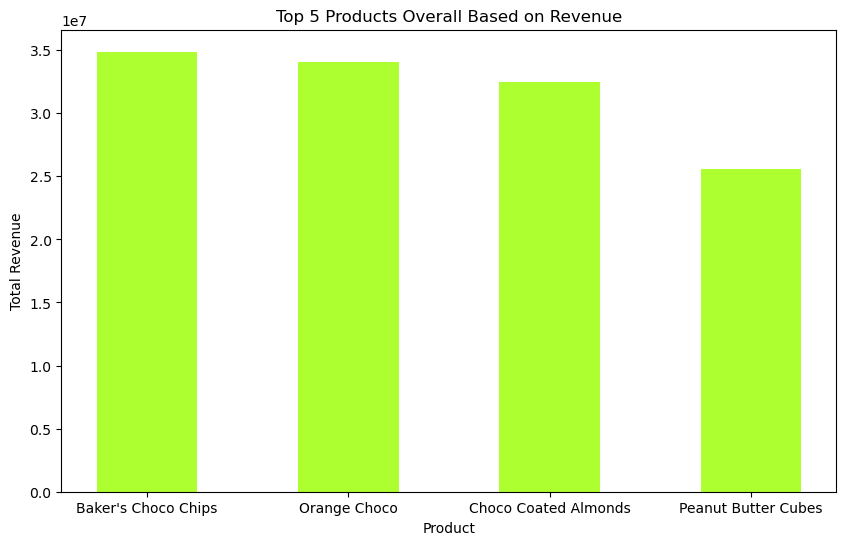

In [16]:
# What are the top 5 products overall based on revenue?

# Calculate total revenue for each product across all months
data['total_revenue'] = data[['Revenue Dec 22', 'Revenue Jan 23', 'Revenue Feb 23', 'Revenue March 23']].sum(axis=1)

# Sort products based on total revenue in descending order
sorted_products = data.sort_values(by='total_revenue', ascending=False)

# Select the top 5 products
top_5_products = sorted_products.head(5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['Product'], top_5_products['total_revenue'], color='greenyellow', width = 0.5)
plt.title('Top 5 Products Overall Based on Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()